In [5]:
import numpy as np
import pylab
import pandas as pd
from scipy.stats import linregress
from matplotlib.colors import LogNorm
from numpy import polyfit
from scipy.optimize import brenth
from scipy.interpolate import interp1d,UnivariateSpline
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sizeDistri_neq_78.txt', sep='\t', header=None)
df.columns = ['NSIM', 'NSIM2', 'NSUMO', 'LSIM', 'LSIM2', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
ratio_in_cluster = []
cluster_size = []
for idx in range(len(df)):
    distri = df.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    ratio_in_cluster.append(sum(sizes[sizes>10])/float(sum(sizes)))
    cluster_size.append(sum(np.square(sizes))/df.loc[idx].NSUMO)
df['RatioInCluster'] = ratio_in_cluster
df['ClusterSize'] = cluster_size
df = df[df.beta==10]
df['monomer_ratio'] = df.NSIM


In [3]:
def get_proba(LSIM):
    meanval = df[df.LSIM==LSIM].groupby(['monomer_ratio'])['ClusterSize'].mean()
    errors = df[df.LSIM==LSIM].groupby(['monomer_ratio'])['ClusterSize'].std()
    ddf = meanval.to_frame()
    errors = errors.to_frame()
    ddf['errors'] = errors['ClusterSize']
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['monomer_ratio']).mean().reset_index()
    return k


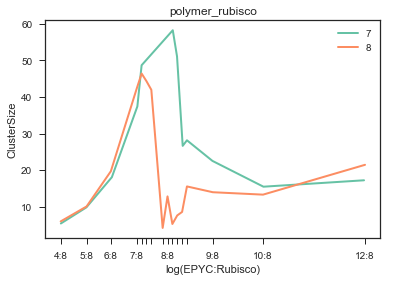

In [16]:

fig,ax = pylab.subplots()

for LEPYC in range(7,9):
    ax.plot(get_proba(LEPYC).monomer_ratio*LEPYC,get_proba(LEPYC).ClusterSize, ls='-', linewidth=2, label=str(LEPYC))


sns.set_style('ticks')
sns.set_palette("Set2", 10)

#ax.set_xscale('log')
ax.set_xticks(get_proba(8).monomer_ratio*8)
ax.set_xticklabels(['4:8','5:8','6:8','7:8','','','','','8:8','','','','','9:8','10:8','12:8','16:8'])
ax.get_xaxis().get_major_formatter().labelOnlyBase = False
ax.set_xlabel('log(EPYC:Rubisco)')
ax.set_ylabel('ClusterSize')

ax.legend()

pylab.title('polymer_rubisco')
#pylab.ylim((-0.05,0.7))


pylab.savefig('/Users/guanhuahe/Desktop/jonikas_lab/Simulation_Rubisco/meet/0801_meet/brick_nonequal_78.pdf')


